In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = fetch_california_housing()
X, y = data.data, data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],))  # No hidden layers
])

C:\Users\kavip\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [7]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 5.9254 - mae: 1.9907 - val_loss: 3.9006 - val_mae: 1.6475
Epoch 2/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.3949 - mae: 1.5317 - val_loss: 2.3678 - val_mae: 1.2285
Epoch 3/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.0650 - mae: 1.1314 - val_loss: 1.3547 - val_mae: 0.8484
Epoch 4/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.1707 - mae: 0.7704 - val_loss: 0.7665 - val_mae: 0.5978
Epoch 5/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6859 - mae: 0.5749 - val_loss: 0.5782 - val_mae: 0.5500
Epoch 6/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6565 - mae: 0.5559 - val_loss: 0.5482 - val_mae: 0.5388
Epoch 7/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6254 - mae: 0.5339 - val_loss: 0.5348 - val_mae: 0.5346
Epoch 8/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6537 - mae: 0.5345 - val_loss: 0.5300 - val_mae: 0.5277
Epoch 9/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - lo

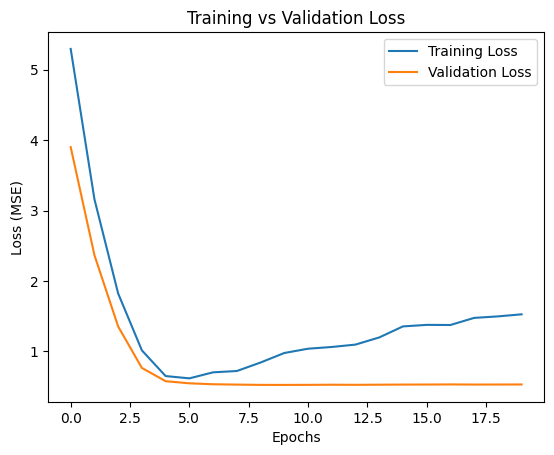

In [8]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()